<a href="https://colab.research.google.com/github/sudeep2711/Bank-Fears-Loanliness/blob/master/Loan_Defaulter_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> <span style="color:#3f538a">Predicting Loan</span> <span style ="color:#eb9e34"> defaulters</span> </center>

In [1]:
pwd()

'/content'

##### This Notebook is meant to be a sample code base for basic data wrangling, EDA and Modelling using Python


<b>*Business Context* </b> <br> When you borrow money from a lender, you make a promise to repay the loan. So if you fail to make on-time payments, your loan can go into <b> default</b>. Some people might knowingly default on loans when they’re unable or unwilling to make payments. Others may unintentionally default because they don’t realize they owe the money. Sometimes people don’t receive late-payment notices, because they recently moved or changed their contact information.

(Source: Credit Karma)

<img src ='https://im.rediff.com/getahead/2010/jun/30home2.jpg' width =200, height =100> 

<b> *Why are we predicting loan defaulters?* </b>
<br>Loans are a big part of a Bank's income source. Banks generate revenue out of the income generated on loans. Similarly banks make huge losses if someone doesn't repay these loans. Hence financial institutions are extremely careful as to whom to offer loans. Banks have to be extremely cautious and avoid cases where they reject a loan application of a potential customer who would ideally repay the loans. Also they need to minimize cases where they give out loans to people who would default later on. Hence machine learning algorithms which predict this have to be really accurate.





----
##### Problem Statement

* The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.


* After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.


* This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with bank, the investors perform a due diligence on the requested loan application. Keep this in mind while understanding data.


* In this challenge, you will help this bank by predicting the probability that a member will default.

----

#### 1. Importing Required Libraries and setting required parameters

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

# To get all the responses in the notebook and not only the last code in the code block
InteractiveShell.ast_node_interactivity = "all"

#Making sure Pandas doesn't truncate columns while displaying in notebook
pd.set_option('display.max_columns', None)  
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 2. Exploratory Data Analytics

### <center><font color='#3f538a'> Data Dictionary</font></center>


|Variable|	Description|
|-----------|--------------|
|member_id|unique ID assigned to each member|
|loan_amnt|	loan amount applied by the member|
|funded_amnt|	loan amount sanctioned by the bank|
|funded_amnt_inv|	loan amount sanctioned by the investors|
|term|	term of loan (in months)|
|batch_enrolled|	batch numbers allotted to members|
|int_rate|	interest rate on loan|
|grade|	grade assigned by the bank|
|sub_grade|	grade assigned by the bank|
|emp_title	|job / Employer title of member|
|emp_length|	employment length, where 0 means less than one year and 10 means ten or more years|
|home_ownership|	status of home ownership|
|annual_inc|	annual income  reported by the member|
|verification_status|	status of income verified by the bank|
|pymnt_plan	|indicates if any payment plan has started against loan|
|desc|	loan description provided by member|
|purpose|	purpose of loan|
|title|	loan title provided by member|
|zip_code|	first three digits of area zipcode of member|
|addr_state|	living state of member|
|dti|	ratio of member's total monthly debt repayment excluding mortgage divided by self reported monthly income|
|delinq_2yrs|	number of 30+ days delinquency in past 2 years|
|inq_last_6mths|	number of inquiries in last 6 months|
|mths_since_last_delinq|	number of months since last delinq|
|mths_since_last_record|	number of months since last public record|
|open_acc	|number of open credit line in member's credit line|
|pub_rec	|number of derogatory public records|
|revol_bal	|total credit revolving balance|
|revol_util	|amount of credit a member is using relative to revol_bal|
|total_acc	|total number of credit lines available in members credit line|
|initial_list_status|	unique listing status of the loan - W(Waiting), F(Forwarded)|
|total_rec_int	|interest received till date|
|total_rec_late_fee|	Late fee received till date|
|recoveries	|post charge off gross recovery|
|collection_recovery_fee|	post charge off collection fee|
|collections_12_mths_ex_med|	number of collections in last 12 months excluding medical collections|
|mths_since_last_major_derog|	months since most recent 90 day or worse rating|
|application_type	|indicates when the member is an individual or joint|
|verification_status_joint|	indicates if the joint members income was verified by the bank|
|last_week_pay|	indicates how long (in weeks) a member has paid EMI after batch enrolled|
|acc_now_delinq	|number of accounts on which the member is delinquent|
|tot_coll_amt	|total collection amount ever owed|
|tot_cur_bal|	total current balance of all accounts|
|total_rev_hi_lim|	total revolving credit limit|
|loan_status|	status of loan amount, 1 = Defaulter, 0 = Non Defaulters|
    


In [3]:
pwd()

'/content'

In [0]:
#reading datasets

train=pd.read_csv('train_indessa.csv')
test=pd.read_csv('test_indessa.csv')

In [6]:
#Checking sample data
train.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0


In [7]:
train.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,82123.000000,532412.000000,532412.000000,5.324280e+05,532141.000000,532412.000000,532428.000000,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,70.093068,11.545594,0.194858,1.692128e+04,55.057189,25.267357,1753.428788,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,28.139219,5.311442,0.583822,2.242322e+04,23.853436,11.843211,2093.199837,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.444000e+03,37.700000,17.000000,441.600000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187600e+04,56.000000,24.000000,1072.690000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,92.000000,14.000000,0.000000,2.084300e+04,73.600000,32.000000,2234.735000,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,121.000000,90.000000,86.000000,2.568995e+06,892.300000,162.000000,24205.620000,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


##### Checking Percentage Null

In [0]:
# Writing a function which checks Percentage of Null values in each column in a Database
def null_perc(df):
    null_columns=df.columns[df.isnull().any()]
    for i in range(0,len(null_columns)):
        print(null_columns[i],':',round(100*df[null_columns[i]].isnull().sum()/len(df),3),'%')

In [9]:
# Checking Null Percentages in training Database
print('Train')
null_perc(train)
# Checking Null Percentages in the test database

print('\n\nTest')
null_perc(test)

Train
batch_enrolled : 15.993 %
emp_title : 5.791 %
emp_length : 5.051 %
annual_inc : 0.001 %
desc : 85.801 %
title : 0.017 %
delinq_2yrs : 0.003 %
inq_last_6mths : 0.003 %
mths_since_last_delinq : 51.191 %
mths_since_last_record : 84.576 %
open_acc : 0.003 %
pub_rec : 0.003 %
revol_util : 0.054 %
total_acc : 0.003 %
collections_12_mths_ex_med : 0.018 %
mths_since_last_major_derog : 75.024 %
verification_status_joint : 99.943 %
acc_now_delinq : 0.003 %
tot_coll_amt : 7.889 %
tot_cur_bal : 7.889 %
total_rev_hi_lim : 7.889 %


Test
batch_enrolled : 12.847 %
emp_title : 5.812 %
emp_length : 5.053 %
annual_inc : 0.0 %
desc : 85.863 %
title : 0.017 %
delinq_2yrs : 0.004 %
inq_last_6mths : 0.004 %
mths_since_last_delinq : 51.207 %
mths_since_last_record : 84.525 %
open_acc : 0.004 %
pub_rec : 0.004 %
revol_util : 0.061 %
total_acc : 0.004 %
collections_12_mths_ex_med : 0.014 %
mths_since_last_major_derog : 75.004 %
verification_status_joint : 99.942 %
acc_now_delinq : 0.004 %
tot_coll_amt : 

##### Treating Missing Values 

* From this information, we can get rid of 'verification_status_joint' and 'desc' columns because they are mostly Nulls
* 'total_rev_hi_lim','tot_cur_bal' and 'tot_coll_amt' have similar columns containing Nulls.
* Impute Nulls in the following columns by 0 : 'mths_since_last_delinq','mths_since_last_record'
* Use Multivariate Imputer to impute the following columns: 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'

batch_enrolled : exclude

emp_title : exclude

emp_length :Median

annual_inc : Median

desc : exclude

title : Exclude

delinq_2yrs : Impute to 0

inq_last_6mths : impute to 0 

mths_since_last_delinq : Median
mths_since_last_record : Median
open_acc : Median

pub_rec : Median

revol_util : Median

total_acc : Median

collections_12_mths_ex_med : Impute to 0

mths_since_last_major_derog : Impute to 0 

verification_status_joint : Median

acc_now_delinq : Impute to 0 

tot_coll_amt : Median

tot_cur_bal : Median

total_rev_hi_lim : Median

## Data Cleaning

#####  Creating Dummy variables/ Treating categorical variables

In [10]:
cat_var=train.select_dtypes(exclude =['float64', 'int64'] ).columns
print('Getting unique factors for categorical variables')
for i in list(cat_var):
    print(i,':',len(train[i].unique()))

Getting unique factors for categorical variables
term : 2
batch_enrolled : 105
grade : 7
sub_grade : 35
emp_title : 190125
emp_length : 12
home_ownership : 6
verification_status : 3
pymnt_plan : 2
desc : 70639
purpose : 14
title : 39694
zip_code : 917
addr_state : 51
initial_list_status : 2
application_type : 2
verification_status_joint : 4
last_week_pay : 98


##### Actions:
* Get rid of the following columns which contain too many categories: 
    * desc
    * title
    * zip_code
    * sub_grade
    * batch_enrolled
    * emp_title
    

In [11]:
print('Transform: emp_length from categorical to Numeric data...')
train['emp_length'].replace('n/a', '0', inplace=True)
test['emp_length'].replace('n/a', '0', inplace=True)
train['emp_length'].replace(to_replace=['years','year','<','\+',' '], value='', regex=True, inplace=True)
test['emp_length'].replace(to_replace=['years','year','<','\+',' '], value='', regex=True, inplace=True)
train['emp_length']=pd.to_numeric(train.emp_length)
test['emp_length']=pd.to_numeric(test.emp_length)


print('Transform: last_week_pay from categorical to Numeric data...')
train['last_week_pay'].replace(to_replace=['th week'], value='', regex=True,inplace= True)
test['last_week_pay'].replace(to_replace=['th week'], value='', regex=True,inplace= True)
train['last_week_pay'].replace(to_replace=['NA'], value='0', regex=True,inplace= True)
test['last_week_pay'].replace(to_replace=['NA'], value='0', regex=True,inplace= True)
# converting to int
train['last_week_pay']=pd.to_numeric(train.last_week_pay)
test['last_week_pay']=pd.to_numeric(test.last_week_pay)




print('Dropping columns: "verification_status_joint","zip_code","title","sub_grade","emp_title" ,"batch_enrolled" and "desc"  ')
train.drop(['verification_status_joint','desc','zip_code','title','sub_grade','emp_title','batch_enrolled'], axis =1,inplace=True)
test.drop(['verification_status_joint','desc','zip_code','title','sub_grade','emp_title','batch_enrolled'], axis =1,inplace=True)


Transform: emp_length from categorical to Numeric data...
Transform: last_week_pay from categorical to Numeric data...
Dropping columns: "verification_status_joint","zip_code","title","sub_grade","emp_title" ,"batch_enrolled" and "desc"  


# Visualizing Data

In [12]:
train.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
grade                           object
emp_length                     float64
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status             object
total_rec_int            

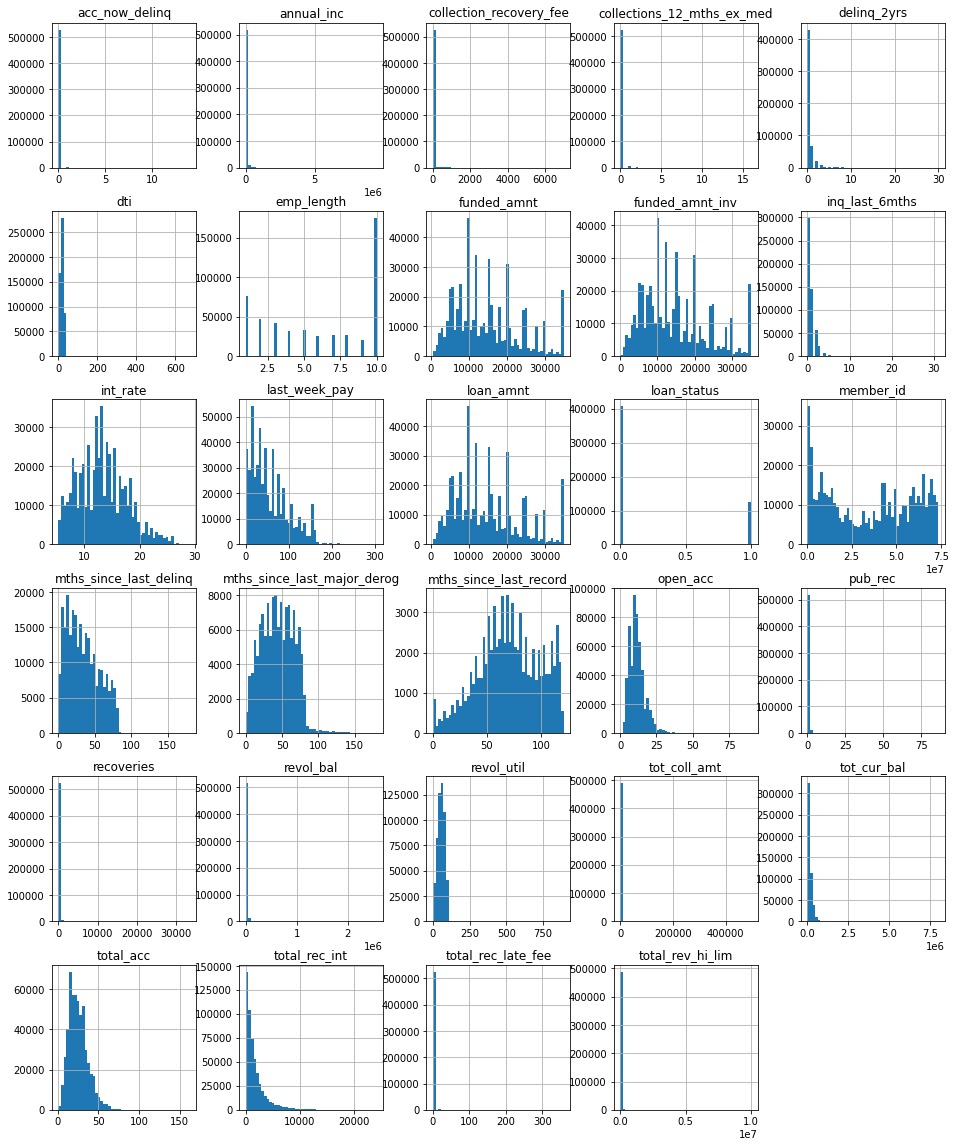

In [13]:
train_num=train.select_dtypes(include = ['float64', 'int64'])
train_cat=train.select_dtypes(exclude =['float64', 'int64'] )
train_num.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10); # ; avoid having the matplotlib verbose informations

#### Annual Income

<Figure size 648x576 with 0 Axes>

count    5.324250e+05
mean     7.502984e+04
std      6.519985e+04
min      1.200000e+03
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

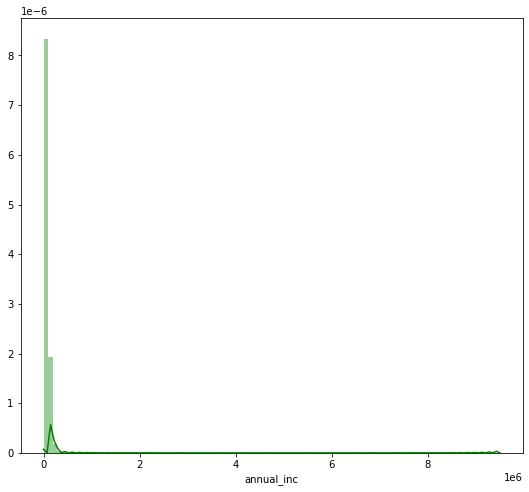

In [14]:
# deep dive- individual plots
plt.figure(figsize=(9,8))
sns.distplot(train['annual_inc'],color = 'g',bins = 100, hist_kws={'alpha':0.4})
(train['annual_inc']).describe()

#### Most of the salary lies around 75000. The maximum salary noted is 9.5 Million

#### DTI

count    532428.000000
mean         18.138767
std           8.369074
min           0.000000
25%          11.930000
50%          17.650000
75%          23.950000
max         672.520000
Name: dti, dtype: float64

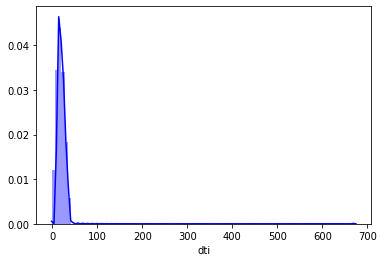

In [15]:
sns.distplot(train['dti'],color = 'b',bins = 100, hist_kws={'alpha':0.4})
(train['dti']).describe()
# Most of the cases lie around 18 ()

#### Recoveries

In [16]:
(train['recoveries']).describe()

count    532428.000000
mean         45.717832
std         409.647467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

In [17]:
train_cat

,term,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,36 months,E,OWN,Source Verified,n,debt_consolidation,FL,f,INDIVIDUAL
1,36 months,B,MORTGAGE,Source Verified,n,home_improvement,MD,w,INDIVIDUAL
2,36 months,A,OWN,Not Verified,n,debt_consolidation,OH,w,INDIVIDUAL
3,36 months,D,RENT,Not Verified,n,debt_consolidation,VA,f,INDIVIDUAL
4,36 months,B,RENT,Verified,n,credit_card,CA,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...
532423,36 months,B,MORTGAGE,Source Verified,n,debt_consolidation,MI,f,INDIVIDUAL
532424,60 months,C,MORTGAGE,Not Verified,n,debt_consolidation,MI,w,INDIVIDUAL
532425,60 months,E,RENT,Verified,n,debt_consolidation,TN,f,INDIVIDUAL
532426,60 months,D,RENT,Source Verified,n,credit_card,OH,w,INDIVIDUAL


### Lets look at some categorical data!

In [0]:
# Creating a function to get percentage of occurances of categories in the dat
def value_perc(df,col):
    col_names= df[col].value_counts().index.to_list()
    values = df[col].value_counts()
    for i in range(0,len(values)):
        print(col_names[i],":",round(100*values[i]/len(df),2),'%')

#### 1. Term 

Training Data  Distribution
36 months : 70.02 %
60 months : 29.98 %

Test Data  Distribution
36 months : 69.96 %
60 months : 30.04 %


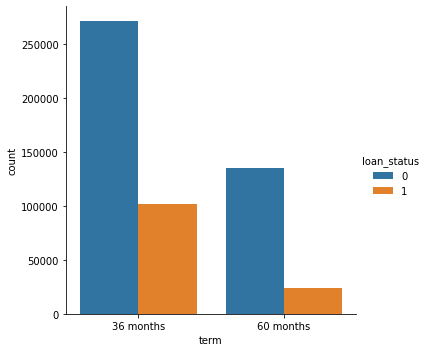

In [19]:
g = sns.catplot(x="term", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1);
print("Training Data  Distribution")
value_perc(train,'term')
print("\nTest Data  Distribution")
value_perc(test,'term')

#### 2. Grade

Training Data  Distribution
B : 28.68 %
C : 27.7 %
A : 16.74 %
D : 15.7 %
E : 7.98 %
F : 2.6 %
G : 0.6 %

Test Data  Distribution
B : 28.69 %
C : 27.71 %
A : 16.65 %
D : 15.77 %
E : 7.95 %
F : 2.6 %
G : 0.64 %


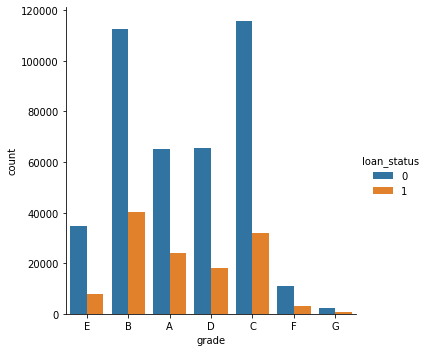

In [20]:
g = sns.catplot(x="grade", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1);
print("Training Data  Distribution")
value_perc(train,'grade')
print("\nTest Data  Distribution")
value_perc(test,'grade')

* We can see that grade e, f and g have a very small percentage of distribution. we can club these together to reduce dimentionality

Training Data  Distribution
B : 28.68 %
C : 27.7 %
A : 16.74 %
D : 15.7 %
Other : 11.18 %

Test Data  Distribution
B : 28.69 %
C : 27.71 %
A : 16.65 %
D : 15.77 %
Other : 11.18 %


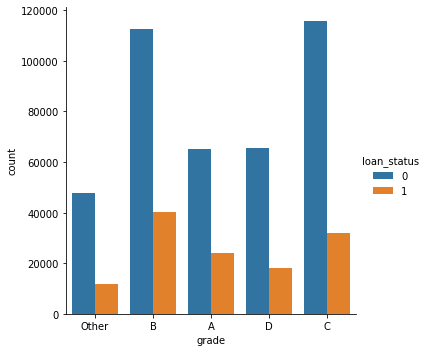

In [21]:
# Replacing grades to reduce dimentionality of data
train['grade'].replace(['E','F','G'], 'Other', inplace=True)
test['grade'].replace(['E','F','G'], 'Other', inplace=True)
g = sns.catplot(x="grade", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1);
print("Training Data  Distribution")
value_perc(train,'grade')
print("\nTest Data  Distribution")
value_perc(test,'grade')


####  3.  Home ownership

Training Data  Distribution
MORTGAGE : 49.95 %
RENT : 40.13 %
OWN : 9.89 %
OTHER : 0.02 %
NONE : 0.01 %
ANY : 0.0 %

Test Data  Distribution
MORTGAGE : 50.04 %
RENT : 40.13 %
OWN : 9.81 %
OTHER : 0.02 %
NONE : 0.0 %


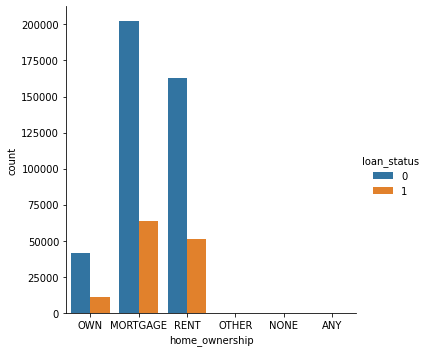

In [22]:
g = sns.catplot(x="home_ownership", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1);
print("Training Data  Distribution")
value_perc(train,'home_ownership')
print("\nTest Data  Distribution")
value_perc(test,'home_ownership')

* We can see that Other, None and Any form a very small part of the distribution, we will club all of the above into others

Training Data  Distribution
MORTGAGE : 49.95 %
RENT : 40.13 %
OWN : 9.89 %
Other : 0.03 %

Test Data  Distribution
MORTGAGE : 50.04 %
RENT : 40.13 %
OWN : 9.81 %
Other : 0.02 %


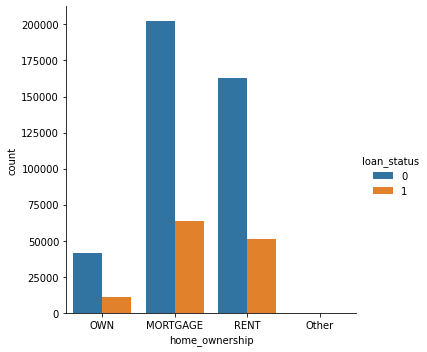

In [23]:
# Replacing home ownerships to reduce dimentionality of data
train['home_ownership'].replace(['OTHER','NONE','ANY'], 'Other', inplace=True)
test['home_ownership'].replace(['OTHER','NONE','ANY'], 'Other', inplace=True)
g = sns.catplot(x="home_ownership", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1);
print("Training Data  Distribution")
value_perc(train,'home_ownership')
print("\nTest Data  Distribution")
value_perc(test,'home_ownership')


#### 4. Verification status

Training Data  Distribution
Source Verified : 37.14 %
Verified : 32.81 %
Not Verified : 30.05 %

Test Data  Distribution
Source Verified : 37.13 %
Verified : 32.78 %
Not Verified : 30.08 %


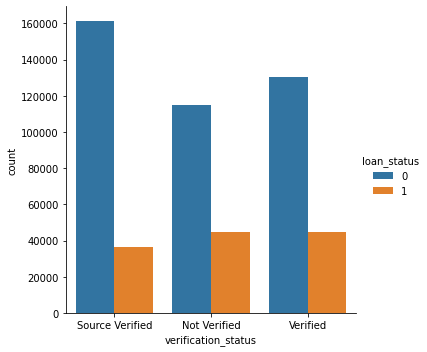

In [24]:
g = sns.catplot(x="verification_status", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1);
print("Training Data  Distribution")
value_perc(train,'verification_status')
print("\nTest Data  Distribution")
value_perc(test,'verification_status')

#### 5. Payment Plan

Training Data  Distribution
n : 100.0 %
y : 0.0 %

Test Data  Distribution
n : 100.0 %
y : 0.0 %


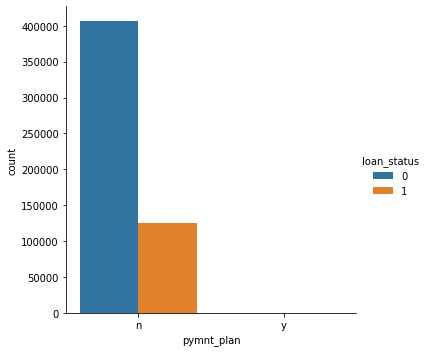

In [25]:
g = sns.catplot(x="pymnt_plan", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1);

print("Training Data  Distribution")
value_perc(train,'pymnt_plan')
print("\nTest Data  Distribution")
value_perc(test,'pymnt_plan')


* because this variable has only one value, we are going to drop this variable

In [0]:
train.drop(['pymnt_plan'], axis =1,inplace=True)
test.drop(['pymnt_plan'], axis =1,inplace=True)

#### 6. Purpose

Training Data  Distribution
debt_consolidation : 59.16 %
credit_card : 23.23 %
home_improvement : 5.84 %
other : 4.82 %
major_purchase : 1.93 %
small_business : 1.15 %
car : 0.99 %
medical : 0.96 %
moving : 0.61 %
vacation : 0.53 %
house : 0.41 %
wedding : 0.26 %
renewable_energy : 0.06 %
educational : 0.05 %

Test Data  Distribution
debt_consolidation : 58.95 %
credit_card : 23.25 %
home_improvement : 5.84 %
other : 4.86 %
major_purchase : 1.97 %
small_business : 1.19 %
car : 1.01 %
medical : 0.96 %
moving : 0.61 %
vacation : 0.54 %
house : 0.43 %
wedding : 0.27 %
renewable_energy : 0.07 %
educational : 0.05 %


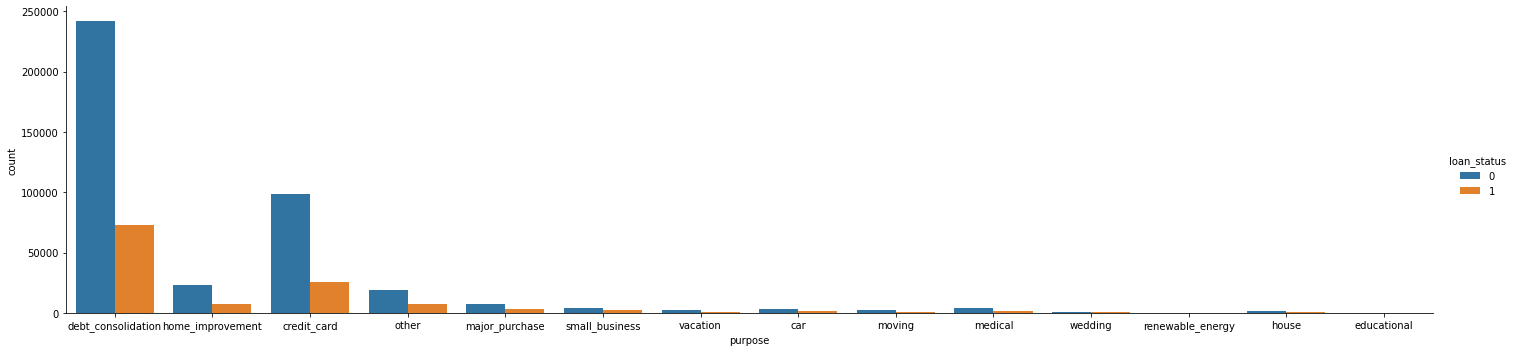

In [27]:
g = sns.catplot(x="purpose", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=4);

print("Training Data  Distribution")
value_perc(train,'purpose')
print("\nTest Data  Distribution")
value_perc(test,'purpose')

* Majority of our loans (60%) are taken for debt consolidation purposes. Debt consolidation is taking loan at a low interest rate to repay many other smaller loans that you might have 
* We can club the following variables together : 'other', 'major_purchase', 'small_business', 'medical', 'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 'educational' and 'car' as 'Others'

Training Data  Distribution
debt_consolidation : 59.16 %
credit_card : 23.23 %
Other : 11.77 %
home_improvement : 5.84 %

Test Data  Distribution
debt_consolidation : 58.95 %
credit_card : 23.25 %
Other : 11.97 %
home_improvement : 5.84 %


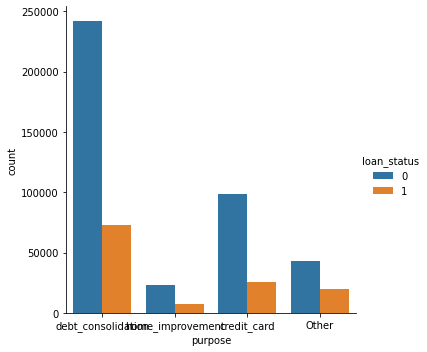

In [28]:
# Replacing purpose to reduce dimentionality of data
train['purpose'].replace(['other', 'major_purchase', 'small_business', 'medical','car', 
                          'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 
                          'educational'], 'Other', inplace=True)


test['purpose'].replace(['other', 'major_purchase', 'small_business', 'medical','car', 
                          'moving', 'vacation', 'house', 'wedding', 'renewable_energy', 
                          'educational'], 'Other', inplace=True)

g = sns.catplot(x="purpose", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1);
print("Training Data  Distribution")
value_perc(train,'purpose')
print("\nTest Data  Distribution")
value_perc(test,'purpose')


#### 7. Initial list status

Training Data  Distribution
f : 51.47 %
w : 48.53 %

Test Data  Distribution
f : 51.51 %
w : 48.49 %


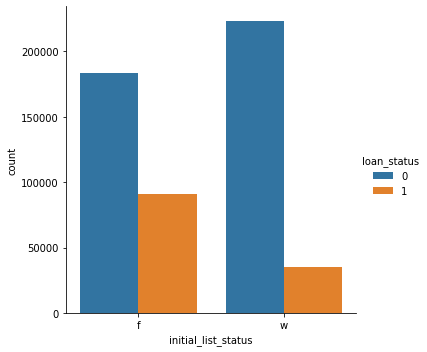

In [29]:
g = sns.catplot(x="initial_list_status", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1
               );

print("Training Data  Distribution")
value_perc(train,'initial_list_status')
print("\nTest Data  Distribution")
value_perc(test,'initial_list_status')

#### 8. Application type

Training Data  Distribution
INDIVIDUAL : 99.94 %
JOINT : 0.06 %

Test Data  Distribution
INDIVIDUAL : 99.94 %
JOINT : 0.06 %


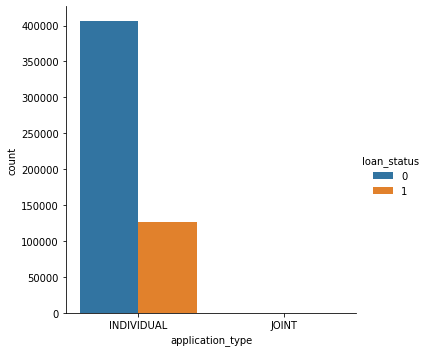

In [30]:
g = sns.catplot(x="application_type", hue="loan_status",
                data=train, kind="count",
                height=5, aspect=1
               );

print("Training Data  Distribution")
value_perc(train,'application_type')
print("\nTest Data  Distribution")
value_perc(test,'application_type')


* Because majority of the data in this column is 'Indiviual, we are going to drop this column as well'

In [0]:
train.drop(['application_type'], axis =1,inplace=True)
test.drop(['application_type'], axis =1,inplace=True)

In [32]:
# Creating One Hot encodings for categorical variables
dummy_cols=['term','grade','home_ownership',
            'verification_status',
            'purpose','initial_list_status']

for i in dummy_cols:
    print('creating dummies for column:',i)
    train=pd.concat([train,pd.get_dummies(train[i],prefix=i, drop_first=True)], axis = 1)
    test=pd.concat([test,pd.get_dummies(test[i],prefix=i, drop_first=True)], axis = 1)

creating dummies for column: term
creating dummies for column: grade
creating dummies for column: home_ownership
creating dummies for column: verification_status
creating dummies for column: purpose
creating dummies for column: initial_list_status


In [0]:
# Dropping original columns ( because we now have one hot encoded columns)
train.drop(dummy_cols, axis =1,inplace=True)
test.drop(dummy_cols, axis =1,inplace=True)

In [34]:
# Checking if test and train have same variables
print(set(train.columns)- set(test.columns))

{'loan_status'}


In [35]:
train.dtypes

member_id                                int64
loan_amnt                                int64
funded_amnt                              int64
funded_amnt_inv                        float64
int_rate                               float64
emp_length                             float64
annual_inc                             float64
addr_state                              object
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
mths_since_last_delinq                 float64
mths_since_last_record                 float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
total_rec_int                          float64
total_rec_late_fee                     float64
recoveries                             float64
collection_re

In [0]:
# Generating a list of column names according to the imputation method
zero_impute_cols =['delinq_2yrs','inq_last_6mths','collections_12_mths_ex_med',
                   'mths_since_last_major_derog','acc_now_delinq']

median_impute_cols =['emp_length','annual_inc','open_acc','pub_rec','revol_util',
                     'total_acc','mths_since_last_delinq','mths_since_last_record','tot_coll_amt',
                   'tot_cur_bal','total_rev_hi_lim']


In [37]:
for col in zero_impute_cols:
    print('Imputation with 0: %s' % (col))
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

for col in median_impute_cols:
    print('Imputation with Median: %s' % (col))
    train[col].fillna(train[col].median(), inplace=True)
    test[col].fillna(test[col].median(), inplace=True)



Imputation with 0: delinq_2yrs
Imputation with 0: inq_last_6mths
Imputation with 0: collections_12_mths_ex_med
Imputation with 0: mths_since_last_major_derog
Imputation with 0: acc_now_delinq
Imputation with Median: emp_length
Imputation with Median: annual_inc
Imputation with Median: open_acc
Imputation with Median: pub_rec
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim


In [0]:
null_perc(test)
null_perc(train)

####  Checking Correlations

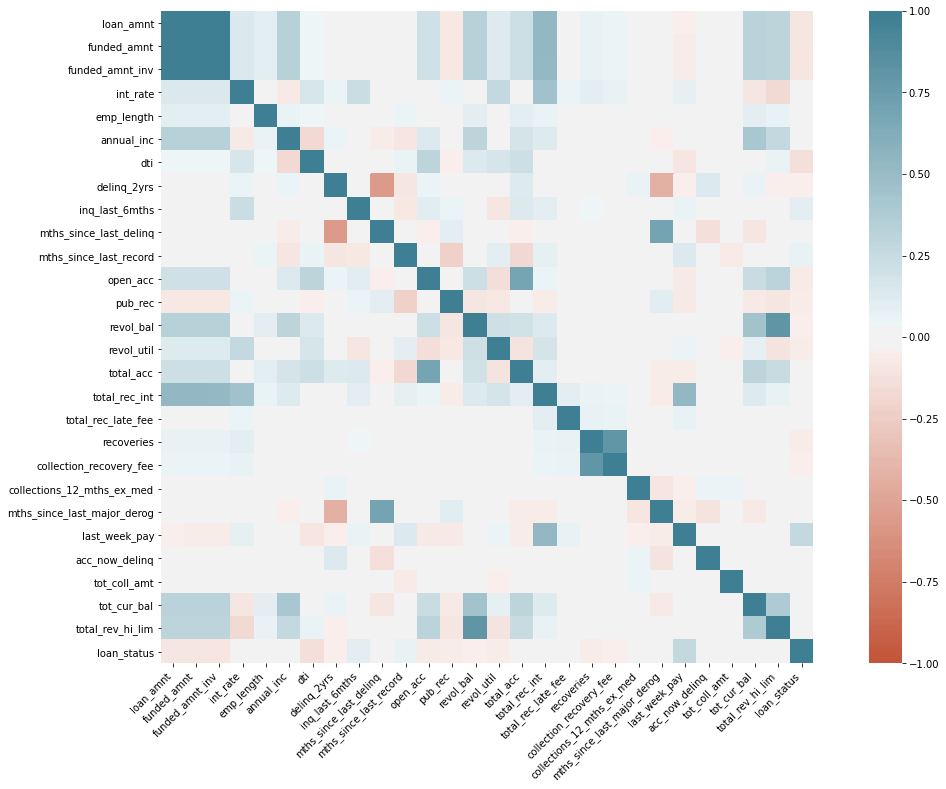

In [39]:
corr = train_num.drop(['member_id'],axis = 1).corr()
plt.figure(figsize=(20, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Model Building

Process for Model Building is as follows:

* Divide training data into 3 sets: 
    * Training Set ( Train using this set)
    * Dev Set/ Cross Validation Set ( Tune Hyper parameters using this set)
    * Test Set ( Get final evaluation metric using this set)
    
 
* We will explore training the following models
    * Logistic regression (Elastic Net Regularized)
    * XG Boost model
    * Neural Network Model
    
* Our evaluation metric will be AUC of the ROC curve

    

#### Importing required libraries for Model Building Process

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [0]:
X= train[list(set(train.columns)-set(['loan_status','addr_state']))]
y = train['loan_status']

In [0]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [0]:
print('Training set data Percentage:', round(100*len(X_train)/len(train),0))
print('Test Set data Percentage:', round(100*len(X_test)/len(train),0))

Training set data Percentage: 80.0
Test Set data Percentage: 20.0


### 1. Logistic Regression with Elastic Net Regularization

In [43]:
parametersGrid = {"penalty": ['elasticnet'],
                      "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "solver":['saga'],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
eNet =LogisticRegression()
grid = RandomizedSearchCV(estimator=eNet,
                            param_distributions=parametersGrid,
                            cv=3,scoring='roc_auc',
                            n_iter=10, 
                            random_state=27,
                            n_jobs = -1,
                           verbose=2)

grid.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100],
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        '

In [0]:
def accuracy_metrics(model,train_x,test_x,train_y,test_y):
    y_train_pred =model.best_estimator_.predict(train_x)
    y_test_pred =model.best_estimator_.predict(test_x)
    print("Train Accuracy:",metrics.accuracy_score(train_y,y_train_pred))
    print("Test Accuracy:",metrics.accuracy_score(test_y,y_test_pred))
    

In [0]:
y_pred= grid.best_estimator_.predict(scaler.fit_transform(X_test))

Text(0.5, 1.0, 'Logistic ROC')

(-0.1, 1.2)

(-0.1, 1.2)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

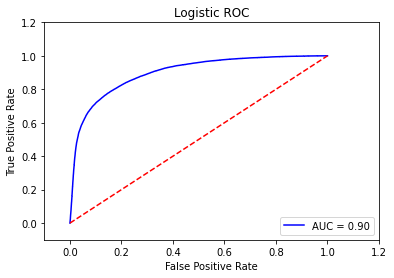

Auc: 0.8975757455739879
Train Accuracy: 0.8670429307276577
Test Accuracy: 0.868283154593092


In [46]:
#Our metric is AUC of the ROC Curve
y_pred = grid.best_estimator_.predict_proba(scaler.fit_transform(X_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Logistic ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Auc:',roc_auc)

accuracy_metrics(grid,scaler.fit_transform(X_train),scaler.fit_transform(X_test), y_train,y_test)

### 2. XG Boost Classifier

In [0]:
import xgboost as xgb
import sklearn

In [0]:
# create a default XGBoost classifier
model = xgb.XGBClassifier(
    tree_method = "gpu_hist",
    eval_metric=["error", "auc"]
)



In [49]:
# Create the grid search parameter grid and scoring funcitons
param_grid = {
    "learning_rate": [0.1, 0.01],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [2, 3, 4],
    "n_estimators": [100, 200, 300, 400],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3],
}


# create the grid search object

grid = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_grid,
    cv=10,
    n_jobs=-1,
    n_iter=30,
    refit="AUC",
    verbose = 2
)
# fit grid search
%time best_model = grid.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.6min finished


CPU times: user 5.74 s, sys: 2.55 s, total: 8.29 s
Wall time: 13min 41s


Text(0.5, 1.0, 'XG Boost ROC')

(-0.1, 1.2)

(-0.1, 1.2)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

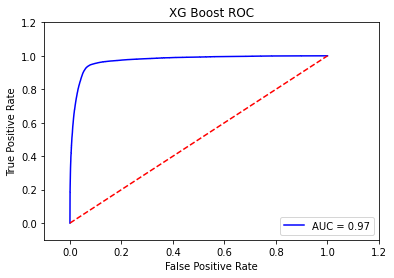

Auc: 0.9729331450454142
Train Accuracy: 0.9365570899324321
Test Accuracy: 0.9341979227316267


In [50]:
y_pred = grid.best_estimator_.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('XG Boost ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Auc:',roc_auc)

accuracy_metrics(grid,X_train,X_test, y_train,y_test)

### 3. Neural Net Classifier- Tensorflow

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorboard.plugins.hparams import api as hp


In [54]:
print(tf.__version__)

2.2.0-rc2


In [69]:
X_train.shape

(425942, 42)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(42, activation=tf.nn.relu),
	  tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [65]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:

model.fit(scaler.fit_transform(X_train), y_train,
          epochs=50,
          batch_size=64,
          learning_rate = 0.01
          )

test_loss, test_acc = model.evaluate(scaler.fit_transform(X_test), y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
6656/6656 [==============================] - 22s 3ms/step - loss: 0.2448 - accuracy: 0.9041
Epoch 2/50
6656/6656 [==============================] - 22s 3ms/step - loss: 0.1992 - accuracy: 0.9250
Epoch 3/50
6656/6656 [==============================] - 22s 3ms/step - loss: 0.1917 - accuracy: 0.9279
Epoch 4/50
6656/6656 [==============================] - 21s 3ms/step - loss: 0.1884 - accuracy: 0.9295
Epoch 5/50
6656/6656 [==============================] - 21s 3ms/step - loss: 0.1867 - accuracy: 0.9297
Epoch 6/50
6656/6656 [==============================] - 22s 3ms/step - loss: 0.1847 - accuracy: 0.9308
Epoch 7/50
6656/6656 [==============================] - 21s 3ms/step - loss: 0.1834 - accuracy: 0.9310
Epoch 8/50
6656/6656 [==============================] - 21s 3ms/step - loss: 0.1825 - accuracy: 0.9315
Epoch 9/50
6656/6656 [==============================] - 21s 3ms/step - loss: 0.1816 - accuracy: 0.9316
Epoch 10/50
6656/6656 [==============================] - 22s 3ms/step - l

3328/3328 [==============================] - 8s 2ms/step - loss: 0.1756 - accuracy: 0.9345
Test accuracy: 0.9345172047615051
